In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# model_id = "aanaxs4g"
model_id = "leuo8izn"
# model_id = "ezb3xkqf"
# gradCAM_file_name = "egknzmgs_gradCAM" # gradCAM model
# gradCAM_file_name = "8urp1dmm_gradCAM" # gradCAM model

# model_id = "egknzmgs" #
# model_id = "8urp1dmm"
model_id_1 = "vosvg9hw"
# model_id_1 = "vdv48shg"
ev_gdf_all_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")

In [4]:
ev_gdf_all = gpd.read_file("Output/Evaluation/"+model_id+".shp")
ev_gdf_all["year"] = ev_gdf_all["patch_name"].str.split("_").str[1]

ev_gdf_all_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")
ev_gdf_all_1["year"] = ev_gdf_all_1["patch_name"].str.split("_").str[1]

In [5]:
ev_gdf_all.head()

,patch_name,true_val,leuo8izn,geometry,year
0,Indiana_2020_july_3328-2816,3.800568,4.359397,"POLYGON ((-86.16658 40.10565, -86.30456 40.105...",2020
1,Indiana_2020_july_3072-3584,0.847230,0.613615,"POLYGON ((-86.30456 39.69170, -86.44254 39.691...",2020
2,Indiana_2019_july_2048-1024,1.534634,1.528363,"POLYGON ((-86.85649 41.07151, -86.99447 41.071...",2019
3,Indiana_2020_july_2048-4608,1.180629,0.908209,"POLYGON ((-86.85649 39.13978, -86.99447 39.139...",2020
4,Indiana_2018_july_4096-2560,3.304477,3.486326,"POLYGON ((-85.75264 40.24363, -85.89062 40.243...",2018


In [7]:
ev_gdf = ev_gdf_all.query("year == '2021'")

In [8]:
ev_gdf.shape

(346, 5)

In [9]:
vmin = np.min(np.array(ev_gdf.loc[:,["true_val",model_id]]))
vmax = np.max(np.array(ev_gdf.loc[:,["true_val",model_id]]))

In [10]:
ev_gdf_all.query("year == '2019'")

,patch_name,true_val,leuo8izn,geometry,year
2,Indiana_2019_july_2048-1024,1.534634,1.528363,"POLYGON ((-86.85649 41.07151, -86.99447 41.071...",2019
11,Indiana_2019_july_3840-1280,2.202356,2.078225,"POLYGON ((-85.89062 40.93353, -86.02860 40.933...",2019
29,Indiana_2019_july_4352-2304,3.174352,3.842772,"POLYGON ((-85.61466 40.38161, -85.75264 40.381...",2019
35,Indiana_2019_july_3328-1280,2.660635,2.530378,"POLYGON ((-86.16658 40.93353, -86.30456 40.933...",2019
38,Indiana_2019_july_768-6656,1.633590,1.329525,"POLYGON ((-87.54639 38.03593, -87.68438 38.035...",2019
...,...,...,...,...,...
1969,Indiana_2019_july_1536-6400,0.690642,0.626445,"POLYGON ((-87.13245 38.17391, -87.27043 38.173...",2019
1981,Indiana_2019_july_4352-4096,3.288410,3.087340,"POLYGON ((-85.61466 39.41574, -85.75264 39.415...",2019
1986,Indiana_2019_july_1280-1024,1.202248,1.253053,"POLYGON ((-87.27043 41.07151, -87.40841 41.071...",2019
1990,Indiana_2019_july_1536-4352,2.522891,3.103359,"POLYGON ((-87.13245 39.27776, -87.27043 39.277...",2019


4.605705352387404


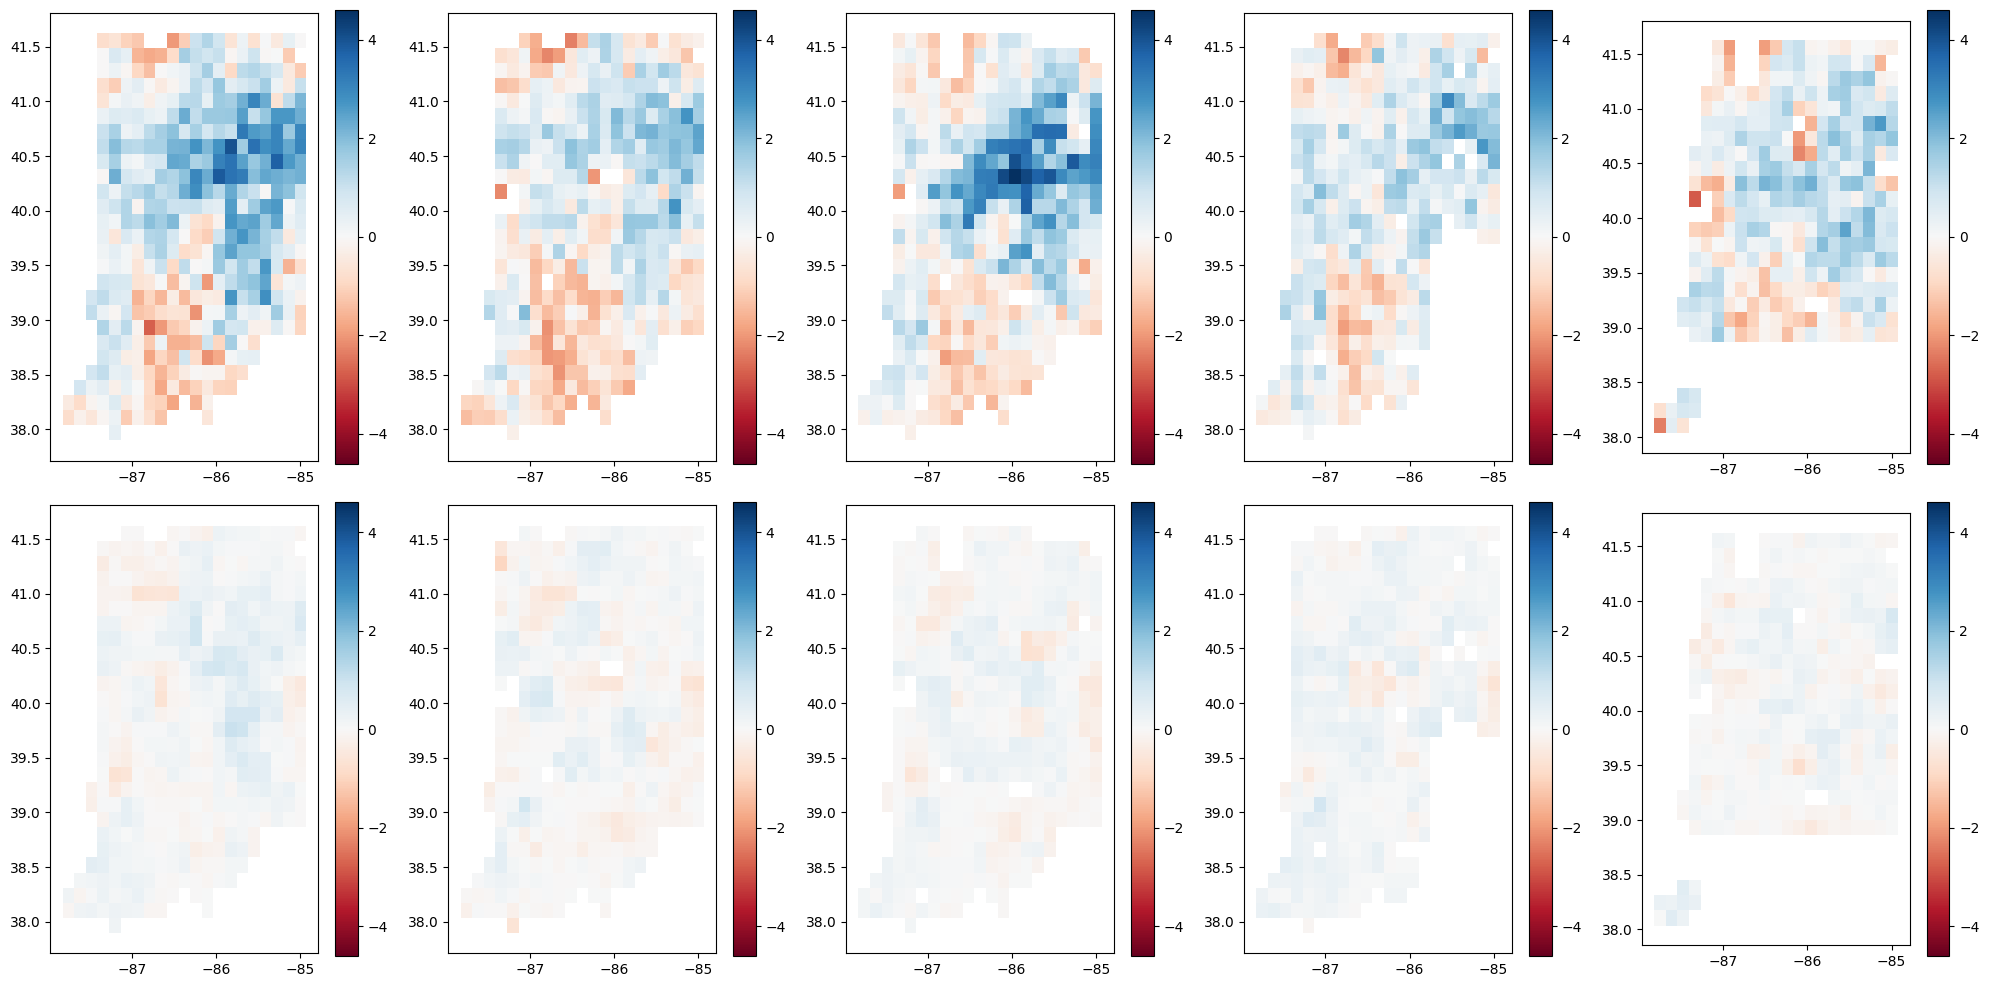

In [11]:
fig,ax = plt.subplots(2,5,figsize=(20,10))

year_list = ['2017','2018','2019','2020','2021']
ev_gdf_all["diff"] = ev_gdf_all["true_val"] - ev_gdf_all[model_id]
ev_gdf_all_1["diff"] = ev_gdf_all_1["true_val"] - ev_gdf_all_1[model_id_1]


# vmin = np.min(np.array(ev_gdf_all_1["diff"]))
vmax = np.max(np.array(ev_gdf_all_1["diff"]))
vmin = -vmax
print(vmax)
for i in range(len(year_list)):
    ev_gdf = ev_gdf_all.query("year == '"+year_list[i]+"'")
    ev_gdf_1 = ev_gdf_all_1.query("year == '"+year_list[i]+"'")
    # ax[i,0].set_title("True Values")
    # ev_gdf.plot(column='true_val',ax=ax[i,0],legend=True,vmin=vmin,vmax=vmax,)
    # ax[i,1].set_title("Predicted Values (Masked)")
    # ev_gdf.plot(column=model_id,ax=ax[i,1],legend = True,vmin=vmin,vmax=vmax)
    
    # ax[i,1].set_title("Predicted Values (No Mask)")
    # ev_gdf_1.plot(column=model_id_1,ax=ax[i,3],legend = True,vmin=vmin,vmax=vmax)
    ev_gdf_1.plot(column = "diff",ax=ax[0,i],legend = True,cmap="RdBu",vmin=vmin,vmax=vmax)
    ev_gdf.plot(column = "diff",ax=ax[1,i],legend = True,cmap="RdBu",vmin=vmin,vmax=vmax)
    
plt.tight_layout()
plt.savefig("Output/Evaluation/true_pred_diff_"+model_id+".png")

In [12]:
ev_gdf.corr()

,true_val,leuo8izn,diff
true_val,1.000000,0.988559,0.053549
leuo8izn,0.988559,1.000000,-0.097683
diff,0.053549,-0.097683,1.000000


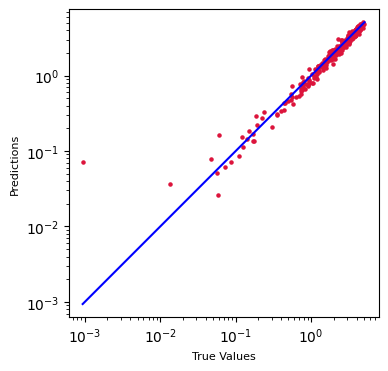

In [13]:
true_value = ev_gdf["true_val"]
predicted_value = ev_gdf[model_id]
plt.figure(figsize=(4,4))
plt.scatter(true_value, predicted_value, c='crimson',s=5)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [14]:
# pd.plotting.scatter_matrix(ev_gdf_1)

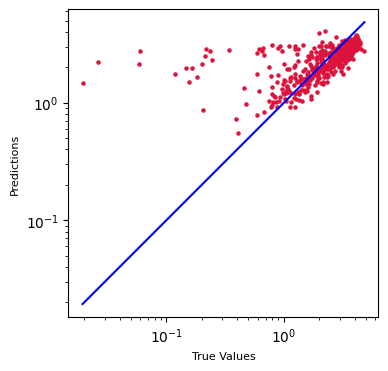

In [15]:
model_id_1 = "ezb3xkqf"
# model_id_1 = "vosvg9hw"
ev_gdf_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")
true_value1 = ev_gdf_1["true_val"]
predicted_value1 = ev_gdf_1[model_id_1]
plt.figure(figsize=(4,4))
plt.scatter(true_value1, predicted_value1, c='crimson',s=5)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value1), max(true_value1))
p2 = min(min(predicted_value1), min(true_value1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [16]:
ev_gdf_1.corr()

,true_val,ezb3xkqf
true_val,1.000000,0.729162
ezb3xkqf,0.729162,1.000000


In [17]:
model_id2 = "leuo8izn"
ev_gdf_2 = gpd.read_file("Output/Evaluation/"+model_id2+".shp")
true_value2 = ev_gdf_2["true_val"]
predicted_value2 = ev_gdf_2[model_id2]

In [19]:
# fig,ax = plt.subplots(1,3,figsize=(12,5))

# ax[0].set_title("True Values")
# ev_gdf_0.plot(column='true_val',ax=ax[0],legend=True,vmin=vmin,vmax=vmax,)
# ax[1].set_title("Predicted Values")
# ev_gdf_0.plot(column=model_id0,ax=ax[1],legend = True,vmin=vmin,vmax=vmax)
# ax[2].set_title("Difference Map")
# ev_gdf_0["diff"] = ev_gdf_0["true_val"] - ev_gdf_0[model_id0]
# ev_gdf_0.plot(column = "diff",ax=ax[2],legend = True,cmap="bwr")

In [21]:
# fig,ax = plt.subplots(1,2,figsize=(12,4))
# ax[0].set_title("Difference Map (with Mask)")

# ev_gdf_0["diff"] = ev_gdf_0["true_val"] - ev_gdf_0[model_id0]
# ev_gdf_0.plot(column = "diff",ax=ax[0],legend = True,cmap="bwr",vmin=-2,vmax=4)

# ax[1].set_title("Difference Map (without Mask)")
# ev_gdf["diff"] = ev_gdf["true_val"] - ev_gdf[model_id]
# ev_gdf.plot(column = "diff",ax=ax[1],legend = True,cmap="bwr",vmin=-2,vmax=4)


# plt.savefig("Output/Evaluation/difference_plot.png")

In [23]:
# 'diff == "'+str(ev_gdf_0["diff"].min())+'"'

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
nomask_train_df = pd.read_csv("Output/saliency_maps_analysis/nomask/bands_mean_per_patch_train.csv")
nomask_test_df = pd.read_csv("Output/saliency_maps_analysis/nomask/bands_mean_per_patch_test.csv")
nomask_train_df.columns = ["patch_name","1","2","3","4","5","6","7","8","9","10","11","12"]
nomask_test_df.columns = ["patch_name","1","2","3","4","5","6","7","8","9","10","11","12"]


target_df = gpd.read_file("Input/Target/concat/target_yield.shp")
nomask_train_df_merged = target_df.merge(nomask_train_df, on="patch_name")
nomask_test_df_merged = target_df.merge(nomask_test_df, on="patch_name")
nomask_train_x = nomask_train_df_merged.loc[:,["1","2","3","4","5","6","7","8","9","10","11","12"]]
nomask_train_y = nomask_train_df_merged.loc[:,["ykg_by_e7"]]
nomask_test_x = nomask_test_df_merged.loc[:,["1","2","3","4","5","6","7","8","9","10","11","12"]]
nomask_test_y = nomask_test_df_merged.loc[:,["ykg_by_e7"]]
print("Train X Shape : ",nomask_train_x.shape)
print("Train Y Shape : ",nomask_train_y.shape)
print("Test X Shape : ",nomask_test_x.shape)
print("Test Y Shape : ",nomask_test_y.shape)

Train X Shape :  (12411, 12)
Train Y Shape :  (12411, 1)
Test X Shape :  (2013, 12)
Test Y Shape :  (2013, 1)


In [25]:
reg2 = LinearRegression().fit(nomask_train_x, nomask_train_y)
reg2.score(nomask_train_x, nomask_train_y)

0.6177576277411003

Linear Regression Intercept:  [-0.868054]


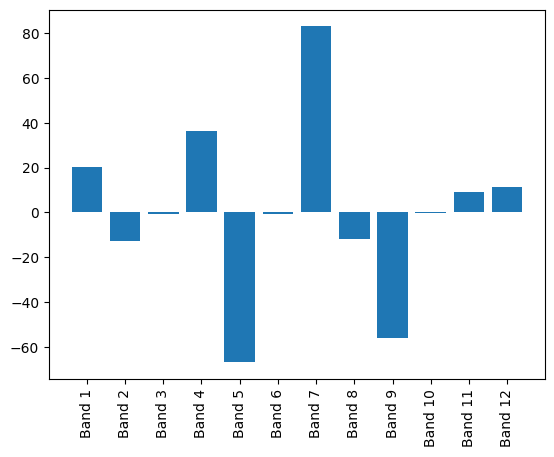

In [26]:
print("Linear Regression Intercept: ",reg2.intercept_)
importance = reg2.coef_.reshape(-1)
bands = ["Band "+str(x+1) for x in range(len(importance))]
# fig = plt.figure(1, [12, 5])
plt.bar(bands, importance,width=0.8)
plt.xticks(bands,rotation="vertical")
plt.show()

In [27]:
nomask_pred_y = reg2.predict(nomask_test_x)
nomask_test_df_merged["ols_pred_yield"] = nomask_pred_y
nomask_test_df_merged["ols_diff"] = nomask_test_df_merged["ykg_by_e7"] - nomask_test_df_merged["ols_pred_yield"]

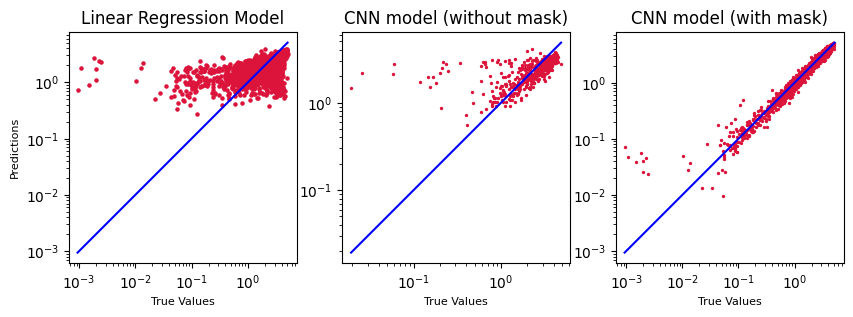

In [28]:
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].set_title("Linear Regression Model")
ax[1].set_title("CNN model (without mask)")
ax[2].set_title("CNN model (with mask)")

true_value0 = nomask_test_df_merged["ykg_by_e7"]
predicted_value0 = nomask_test_df_merged["ols_pred_yield"]

ax[0].scatter(true_value0, predicted_value0, c='crimson',s=5)
ax[0].set_yscale('log')
ax[0].set_xscale('log')

p1_0 = max(max(predicted_value0), max(true_value0))
p2_0 = min(min(predicted_value0), min(true_value0))
ax[0].plot([p1_0, p2_0], [p1_0, p2_0], 'b-')
ax[0].set_xlabel('True Values', fontsize=8)
ax[0].set_ylabel('Predictions', fontsize=8)
ax[0].axis('equal')



model_id_1 = "ezb3xkqf"
ev_gdf_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")
true_value1 = ev_gdf_1["true_val"]
predicted_value1 = ev_gdf_1[model_id_1]
# plt.figure(figsize=(4,4))
ax[1].scatter(true_value1, predicted_value1, c='crimson',s=2)
ax[1].set_yscale('log')
ax[1].set_xscale('log')

p1 = max(max(predicted_value1), max(true_value1))
p2 = min(min(predicted_value1), min(true_value1))
ax[1].plot([p1, p2], [p1, p2], 'b-')
ax[1].set_xlabel('True Values', fontsize=8)
# ax[1].set_ylabel('Predictions', fontsize=8)
ax[1].axis('equal')


model_id2 = "leuo8izn"
ev_gdf_2 = gpd.read_file("Output/Evaluation/"+model_id2+".shp")
true_value2 = ev_gdf_2["true_val"]
predicted_value2 = ev_gdf_2[model_id2]

ax[2].scatter(true_value2, predicted_value2, c='crimson',s=2)
ax[2].set_yscale('log')
ax[2].set_xscale('log')

p1_0 = max(max(predicted_value2), max(true_value2))
p2_0 = min(min(predicted_value2), min(true_value2))
ax[2].plot([p1_0, p2_0], [p1_0, p2_0], 'b-')
ax[2].set_xlabel('True Values', fontsize=8)
# ax[2].set_ylabel('Predictions', fontsize=8)
ax[2].axis('equal')

# plt.savefig("Output/Evaluation/true_v.png")
plt.show()



In [61]:
import math
math.pow(10,-1.5)

0.03162277660168379

In [62]:
ev_gdf_all_2[ev_gdf_all_2["true_val"] < 0.031]

,patch_name,true_val,leuo8izn,geometry,year,diff
51,Indiana_2018_july_2304-512,0.001822,0.055051,"POLYGON ((-86.71851 41.34748, -86.85649 41.347...",2018,-0.053229
186,Indiana_2017_july_3072-4864,0.001083,0.047094,"POLYGON ((-86.30456 39.00180, -86.44254 39.001...",2017,-0.046011
343,Indiana_2019_july_3328-3584,0.027003,0.081695,"POLYGON ((-86.16658 39.69170, -86.30456 39.691...",2019,-0.054692
621,Indiana_2019_july_3072-4864,0.001485,0.037976,"POLYGON ((-86.30456 39.00180, -86.44254 39.001...",2019,-0.036491
718,Indiana_2019_july_2304-4608,0.010428,0.049053,"POLYGON ((-86.71851 39.13978, -86.85649 39.139...",2019,-0.038625
773,Indiana_2020_july_3072-4864,0.002022,0.039445,"POLYGON ((-86.30456 39.00180, -86.44254 39.001...",2020,-0.037423
902,Indiana_2020_july_2304-512,0.002270,0.045447,"POLYGON ((-86.71851 41.34748, -86.85649 41.347...",2020,-0.043177
1083,Indiana_2021_july_3072-4864,0.000938,0.071127,"POLYGON ((-86.30456 39.00180, -86.44254 39.001...",2021,-0.070189
1312,Indiana_2018_july_3072-4864,0.001979,0.025540,"POLYGON ((-86.30456 39.00180, -86.44254 39.001...",2018,-0.023561
1338,Indiana_2017_july_2304-512,0.002485,0.023517,"POLYGON ((-86.71851 41.34748, -86.85649 41.347...",2017,-0.021032


In [30]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(true_value0, predicted_value0))
print(mean_squared_error(true_value1, predicted_value1))
print(mean_squared_error(true_value2, predicted_value2))


1.0935994782797915
0.6411094098612322
0.05561332109146605


In [31]:
ev_gdf_2.corr()

,true_val,leuo8izn
true_val,1.000000,0.982565
leuo8izn,0.982565,1.000000


In [16]:
ev_gdf_1.corr()

,true_val,ezb3xkqf
true_val,1.000000,0.729162
ezb3xkqf,0.729162,1.000000


In [50]:
year_list = ['2017','2018','2019','2020','2021']
ev_gdf_all_0 = nomask_test_df_merged
ev_gdf_all_2 = ev_gdf_2
model_id_1 = "vosvg9hw"
model_id_2 = "leuo8izn"
ev_gdf_all_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")
ev_gdf_all_2 = gpd.read_file("Output/Evaluation/"+model_id_2+".shp")

ev_gdf_all_1["year"] = ev_gdf_all_1["patch_name"].str.split("_").str[1]
ev_gdf_all_2["year"] = ev_gdf_all_2["patch_name"].str.split("_").str[1]

ev_gdf_all_0["diff"] = ev_gdf_all_0["ykg_by_e7"] - ev_gdf_all_0["ols_pred_yield"]
ev_gdf_all_1["diff"] = ev_gdf_all_1["true_val"] - ev_gdf_all_1[model_id_1]
ev_gdf_all_2["diff"] = ev_gdf_all_2["true_val"] - ev_gdf_all_2[model_id_2]

In [51]:
fig,ax = plt.subplots(3,5,figsize=(30,10))



# vmin = np.min(np.array(ev_gdf_all_1["diff"]))
vmax = np.max(np.array(ev_gdf_all_0["diff"]))
vmin = -vmax
print(vmax)
for i in range(len(year_list)):
    ev_gdf_0 = ev_gdf_all_0.query("year == '"+year_list[i]+"'")
    ev_gdf_1 = ev_gdf_all_1.query("year == '"+year_list[i]+"'")
    ev_gdf_2 = ev_gdf_all_2.query("year == '"+year_list[i]+"'")
    print(0)
    # ax[i,0].set_title("True Values")
    # ev_gdf.plot(column='true_val',ax=ax[i,0],legend=True,vmin=vmin,vmax=vmax,)
    # ax[i,1].set_title("Predicted Values (Masked)")
    # ev_gdf.plot(column=model_id,ax=ax[i,1],legend = True,vmin=vmin,vmax=vmax)
    
    # ax[i,1].set_title("Predicted Values (No Mask)")
    # ev_gdf_1.plot(column=model_id_1,ax=ax[i,3],legend = True,vmin=vmin,vmax=vmax)
    ev_gdf_0.plot(column = "diff",ax=ax[0,i],legend = True,cmap="RdBu",vmin=vmin,vmax=vmax)
    print(1)
    ev_gdf_1.plot(column = "diff",ax=ax[1,i],legend = True,cmap="RdBu",vmin=vmin,vmax=vmax)
    print(2)
    ev_gdf_2.plot(column = "diff",ax=ax[2,i],legend = True,cmap="RdBu",vmin=vmin,vmax=vmax)
    print(3)
plt.tight_layout()
plt.savefig("Output/Evaluation/true_pred_diff_"+model_id+".png")

3.9246659428254755
0
1


/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 3000x1000 with 16 Axes>

In [35]:
ev_gdf_0.query('aanaxs4g <= 0.2')

,patch_name,true_val,aanaxs4g,geometry,diff
30,Iowa_2021_july_8192-4096,0.147753,0.174421,"POLYGON ((-92.08630 41.15560, -92.22428 41.155...",-0.026668
118,Iowa_2021_july_7936-4096,0.155251,0.178382,"POLYGON ((-92.22428 41.15560, -92.36226 41.155...",-0.023132
363,Iowa_2021_july_3584-4096,0.164877,0.188881,"POLYGON ((-94.56996 41.15560, -94.70794 41.155...",-0.024003
387,Iowa_2021_july_4096-4096,0.025952,0.121408,"POLYGON ((-94.29400 41.15560, -94.43198 41.155...",-0.095455
407,Iowa_2021_july_3840-4096,0.058569,0.115937,"POLYGON ((-94.43198 41.15560, -94.56996 41.155...",-0.057367
419,Iowa_2021_july_9728-4096,0.019321,0.100719,"POLYGON ((-91.25841 41.15560, -91.39639 41.155...",-0.081399


In [ ]:
import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt

# "Iowa_2021_july_8192-4096"

# "Iowa_2021_july_1280-3072"

file_name = "Iowa_2021_july_3584-4096"
file = rasterio.open('Input/sentinel/patches_256/Iowa_July_1_31/test/'+file_name+'.tif')
fig, ax = plt.subplots(4,4,figsize=(7,7))

col = 0 
row = 0
for i in range(1,file.count+1):
#     print(row,col)
    
    show((file,i),ax = ax[row,col],title = "Band "+str(i))
    ax[row,col].axis("off")
    row+=1
    if i >= 4 and i %4==0:
        row = 0
        col+=1
#     col+=1